<a href="https://colab.research.google.com/github/praddhumnasoni/ARAI-Assingment/blob/main/ARAI_Assignment_Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unzip dataset
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz -O urban8k.tgz
!tar -xzf urban8k.tgz
!rm urban8k.tgz

--2022-07-20 05:14:12--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘urban8k.tgz’

urban8k.tgz         100%[===================>]   5.61G  19.1MB/s    in 4m 11s  

2022-07-20 05:18:26 (22.8 MB/s) - ‘urban8k.tgz’ saved [6023741708/6023741708]



In [ ]:
#Importing Library
import librosa 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import IPython.display

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [ ]:
#Testing with one Audio data file
audio_file_path = 'UrbanSound8K/audio/fold1/102106-3-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data) #printing imported data

[ 0.00652341  0.00239341 -0.00151045 ...  0.00088413 -0.00176583
  0.00274018]


[ 0.00652341  0.00239341 -0.00151045 ...  0.00088413 -0.00176583
  0.00274018]


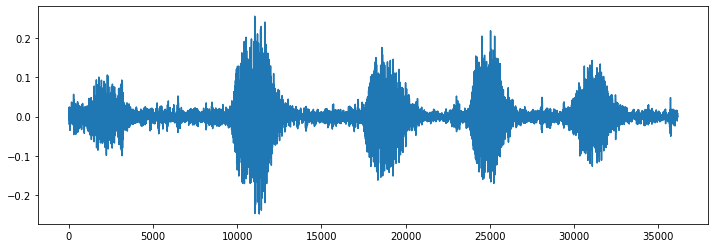

In [ ]:
#Plotting loaded Audio data
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
print(librosa_audio_data)

In [ ]:
#Tring similar thing with different Library
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

[[-385  996]
 [-378  810]
 [-539  588]
 ...
 [-193    4]
 [ 103  192]
 [ 177  226]]


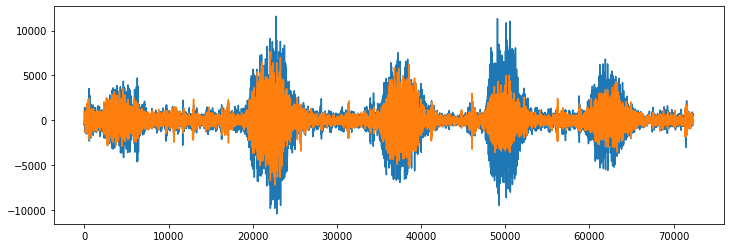

In [ ]:
#Plotting Stereo Audio Data
plt.figure(figsize=(12,4))
plt.plot(wave_audio)
print(wave_audio)

In [ ]:
#Importing Meta-data
audio_dataset_path = 'UrbanSound8K/audio'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
#Extracting Features using MFCC
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
extracted_features=[]

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]r
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])


3555it [05:58, 10.34it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8325it [13:19, 16.75it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [14:00, 10.39it/s]


In [ ]:
#Generating DataFrame
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','classes'])
extracted_features_df.head()


,features,classes
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",children_playing
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",children_playing


In [ ]:
#Spliting Labeled and Features
x=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['classes'].tolist())


In [ ]:
y=np.array(pd.get_dummies(y))
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
#Spliting Dataset into Train and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
#Defining Model
model = Sequential()

model.add(Dense(40,input_shape=(40,)))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(30))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(20))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1640      
                                                                 
 activation (Activation)     (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 activation_1 (Activation)   (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 activation_2 (Activation)   (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
r#Training Model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='model/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
210/219 [===========================>..] - ETA: 0s - loss: 3.3916 - accuracy: 0.2362
Epoch 1: val_loss improved from inf to 1.89819, saving model to model/audio_classification.hdf5
219/219 [==============================] - 2s 4ms/step - loss: 3.3389 - accuracy: 0.2401 - val_loss: 1.8982 - val_accuracy: 0.3480
Epoch 2/100
210/219 [===========================>..] - ETA: 0s - loss: 1.7198 - accuracy: 0.4043
Epoch 2: val_loss improved from 1.89819 to 1.61547, saving model to model/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.7124 - accuracy: 0.4070 - val_loss: 1.6155 - val_accuracy: 0.4654
Epoch 3/100
218/219 [============================>.] - ETA: 0s - loss: 1.4732 - accuracy: 0.5027
Epoch 3: val_loss improved from 1.61547 to 1.41652, saving model to model/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4737 - accuracy: 0.5028 - val_loss: 1.4165 - val_accuracy: 0.5392
Epoch 4/100
213/219 

In [ ]:
#Testing Accuracy 
test_accuracy = model.evaluate(x_test,y_test,verbose=0)
test_accuracy

[0.8740182518959045, 0.7945048809051514]

In [ ]:
#Trying to Predict for an instance
test_file_path = 'UrbanSound8K/audio/fold1/101415-3-0-3.wav'
prediction_feature=features_extractor(test_file_path)
prediction_feature=prediction_feature.reshape(1,-1)
prediction = model.predict(prediction_feature)
np.argmax(prediction)

3

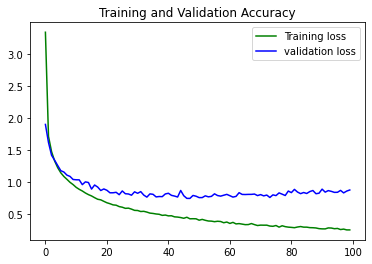

In [ ]:
#Plotting Graph
loss_train = history.history['loss']
loss_val = history.history['val_loss']
accu = history.history['accuracy']
accu_val = history.history['val_accuracy']
epochs = range(0,100)
plt.title('Training and Validation Accuracy')
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.legend()
plt.show()

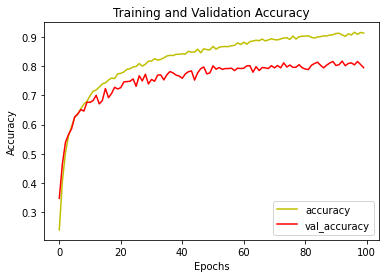

In [ ]:
#Plotting Graphs
plt.plot(epochs, accu, 'y', label='accuracy')
plt.plot(epochs, accu_val, 'r', label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
ytest = [np.argmax(i) for i in y_test]

In [ ]:
#Generating Confuion Metrics
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest,y_pred)
confusion_matrix
 

array([[181,   0,   5,   0,   0,   0,   0,   1,   0,   8],
       [  1,  73,   0,   4,   2,   2,   0,   4,   0,   5],
       [  6,   3, 129,  15,   1,   2,   7,   0,   5,  37],
       [  4,   0,  12, 140,   1,   3,   6,   0,   6,  10],
       [  2,   2,   5,   1, 165,   4,   0,  15,   1,   7],
       [  6,   4,   5,   6,   3, 185,   0,   1,   0,   6],
       [  0,   0,   7,  10,   1,   1,  59,   0,   3,   6],
       [  1,   3,   0,   0,   3,   1,   0, 170,   0,   9],
       [  4,   3,  11,   5,   1,   3,   0,   0, 170,   2],
       [  7,   8,  15,  12,   7,   8,   1,   8,   1, 116]])

Text(69.0, 0.5, 'Truth')

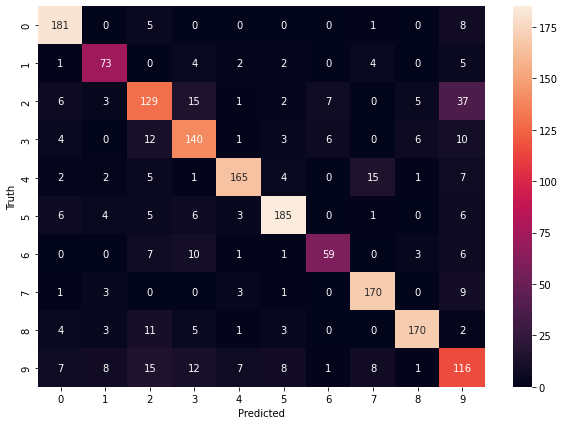

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')